In [241]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Datensätze

In [242]:
df_train = pd.read_csv("dataset/dengue_features_train.csv")
df_labels = pd.read_csv("dataset/dengue_labels_train.csv")

# Teilung in sj und iq
Die Datensätze werden anhand der Stadt (sj für San Juan und iq für Iquitos) aufgeteilt für eine einfachere Bearbeitung.
Aus diesem Grund wird auch der Label-Trainingsdatensatz wird aufgeteilt.

In [243]:
df_sj_train = df_train.loc[df_train['city']=='sj']
df_sj_labels = df_labels.loc[df_labels['city']=='sj']
df_sj_train.drop(columns=['city'],inplace=True)
df_sj_labels.drop(columns=['city'],inplace=True)

df_iq_train = df_train.loc[df_train['city']=='iq']
df_iq_labels = df_labels.loc[df_labels['city']==('iq')]
df_iq_train.drop(columns=['city'],inplace=True)
df_iq_labels.drop(columns=['city'],inplace=True)
ignore_cols = ['year', 'weekofyear', 'week_start_date']

C:\Users\rener\AppData\Local\Temp\ipykernel_13044\1116058332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train.drop(columns=['city'],inplace=True)
C:\Users\rener\AppData\Local\Temp\ipykernel_13044\1116058332.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_labels.drop(columns=['city'],inplace=True)
C:\Users\rener\AppData\Local\Temp\ipykernel_13044\1116058332.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

# Beschreibung der Attribute

### NDVI-Daten
Spanne von -1 bis 1.
Sagt Vegetation aus.
<0 steht für Wasser, Wolken
zwischen 0 und 0.1 steht für barrer Boden
zwischen 0.1 und 0.5 steht für karge Vegetation
\>0.5 steht für enge, grüne Vegetation
* ndvi_ne: im nordöstlichen Quadrant
* ndvi_nw: im nordwestlichen Quadrant
* ndvi_se: im südöstlichen Quadrant
* ndvi_sw: im südwestlichen Quadrant

### NCEP Klima-Vorhersage System Reanalyse
| Attribut                              | Maßeinheit                          | Beschreibung                               |
|---------------------------------------|-------------------------------------|--------------------------------------------|
| reanalysis_sat_precip_amt_mm          | Millimeter                          | Insgesamter Niederschlag                   |
| reanalysis_dew_point_temp_k           | °Kelvin                             | durchschnittliche Tautemperatur            |
| reanalysis_air_temp_k                 | °Kelvin                             | Durchschnittliche Lufttemperatur           |
| reanalysis_relative_humidity_percen   | Prozent                             | Durchschnittliche relative Feuchtigkeit    |
| reanalysis_specific_humidity_g_per_kg | Gramm (Wasser) pro Kilogramm (Luft) | Durchschnittliche spezifische Feuchtigkeit |
| reanalysis_precip_amt_kg_per_m2       | Kilogramm pro Quadratmeter          | Insgesamter Niederschlag                   |
| reanalysis_max_air_temp_k             | °Kelvin                             | Maximale Lufttemperatur                    |
| reanalysis_min_air_temp_k             | °Kelvin                             | Minimale Lufttemperatur                    |
| reanalysis_avg_temp_k                 | °Kelvin                             | Durchschnittliche Lufttemperatur           |
| reanalysis_tdtr_k                     | °Kelvin                             | Tägliche Temperaturspanne                  |

### PERSIANN Niederschlagsdaten vom Satellit
* precipitation_amt_mm: Insgesamter Niederschlag in Millimeter

### GHCN Tägliche Klimadaten
| Attribut                | Maßeinheit | Beschreibung              |
|-------------------------|------------|---------------------------|
| station_max_temp_c      | °Celsius   | Maximale Temperatur       |
| station_min_temp_c      | °Celsius   | Minimale Temperatur       |
| station_avg_temp_c      | °Celsius   | Durchschnittstemperatur   |
| station_precip_mm       | Millimeter | Insgesamter Niederschlag  |
| station_diur_temp_rng_c | °Celsius   | Tägliche Temperaturspanne |

# Visualisiere Daten
### Zeitreihendarstellung
Wie viele Krankheitsfälle gibt es im Laufe der Zeit?
Zur besser Ansicht werden die Einträge in 'week_start_date' von String in datetime-Objekte umgewandelt.

C:\Users\rener\AppData\Local\Temp\ipykernel_13044\3727925516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')
C:\Users\rener\AppData\Local\Temp\ipykernel_13044\3727925516.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iq_train['week_start_date'] = pd.to_datetime(df_iq_train['week_start_date'], format='%Y-%m-%d')


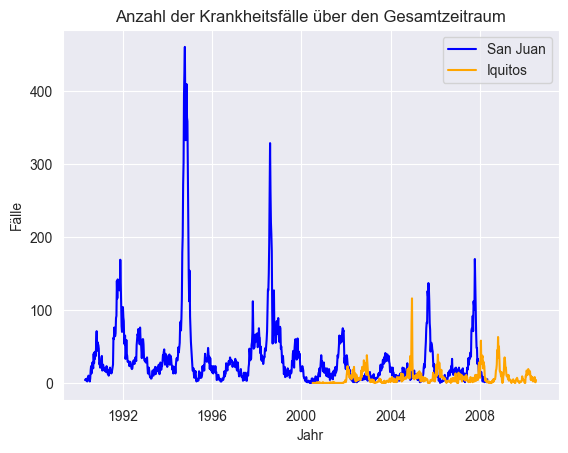

In [244]:
df_sj_train['week_start_date'] = pd.to_datetime(df_sj_train['week_start_date'], format='%Y-%m-%d')
df_iq_train['week_start_date'] = pd.to_datetime(df_iq_train['week_start_date'], format='%Y-%m-%d')

plt.plot(df_sj_train['week_start_date'], df_sj_labels['total_cases'], label='San Juan', color='blue')
plt.plot(df_iq_train['week_start_date'], df_iq_labels['total_cases'], label='Iquitos', color='orange')

plt.title('Anzahl der Krankheitsfälle über den Gesamtzeitraum')
plt.xlabel('Jahr')
plt.ylabel('Fälle')
plt.legend()
plt.savefig('pictures/total_cases_im_gesamtzeitraum.png',bbox_inches="tight")
plt.show()

### Fehlende Werte
Hier werden fehlende Werte visualisiert.

Im sj-Datensatz sieht man zwei Daten, die, außer die NDVI-Attribute, null Werte besitzen. Sie sind mit dem Datum 1992-01-01 und 1998-01-01 gekennzeichnet.
Es gibt eine große Lücke an Werten der NDVI-Attribute von 1994-09-24 bis 1994-12-24
Im iq-Datensatz sind vier Daten, die viele null Werte besitzen, manchmal mit den NDVI-Attributen, manchmal ohne: 2004-01-01, 2005-01-01, 2009-01-01, 2010-01-01
Es gibt zwei große Lücken an Werten der Attribute 'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c', 'station_min_temp_c' von 2008-06-10 bis 2008-07-15

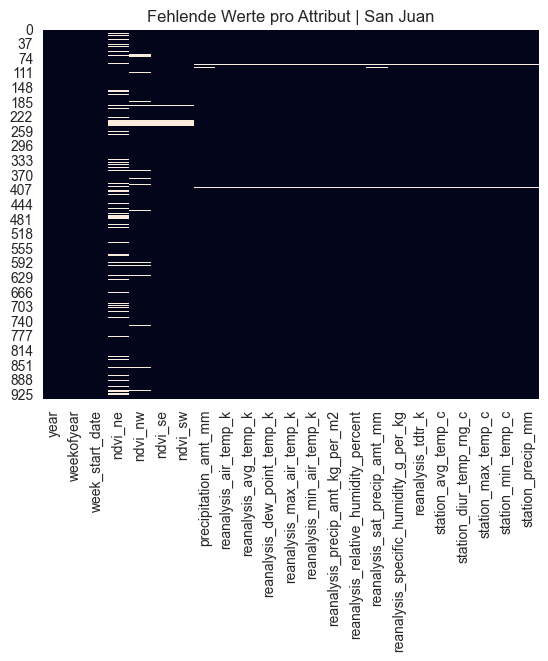

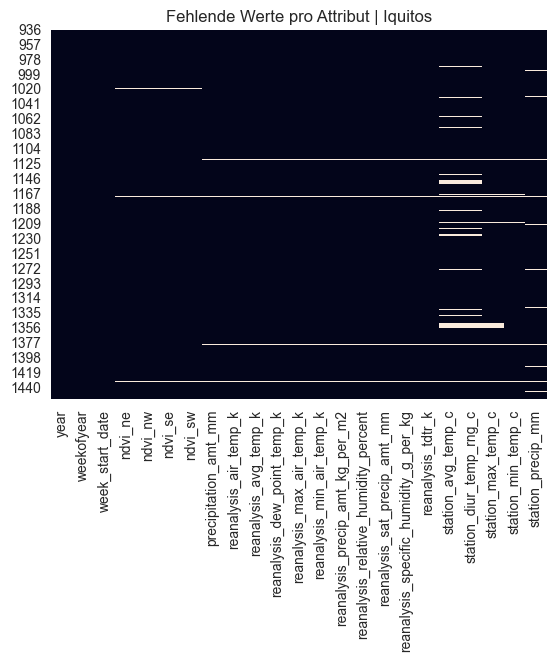

In [245]:
sns.heatmap(df_sj_train.isnull(), cbar=False).set(title='Fehlende Werte pro Attribut | San Juan')
plt.savefig('pictures/null_werte_pro_attribut_sj.png',bbox_inches="tight")
plt.show()
sns.heatmap(df_iq_train.isnull(), cbar=False).set(title='Fehlende Werte pro Attribut | Iquitos')
plt.savefig('pictures/null_werte_pro_attribut_iq.png',bbox_inches="tight")
plt.show()

Hier sieht man die Attribute, die am meisten mit null Werten belegt sind. 
Die NDVI-Attribute sind ganz oben, mit 'ndvi_ne' am lückenhaftesten.

C:\Users\rener\AppData\Local\Temp\ipykernel_13044\2660870699.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")


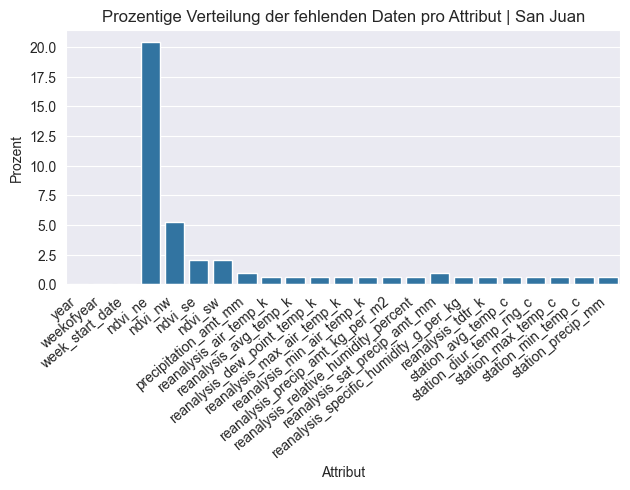

In [246]:
null_vals = df_sj_train.isnull().sum()
total_vals = len(df_sj_train)
null_percent = (null_vals / total_vals) * 100

df_null_percent = pd.DataFrame({'Attribut': null_vals.index, 'Prozent': null_percent.values})

barplot = sns.barplot(x='Attribut', y='Prozent', data=df_null_percent)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Prozentige Verteilung der fehlenden Daten pro Attribut | San Juan')
plt.savefig('pictures/prozentverteilung_null_werte_sj.png',bbox_inches="tight")
plt.show()

Hier sind die GHCN-Weather Station-Werte meistens null, mit 'station_avg_temp_c' und 'station_diur_temp_rng_c' am häufigsten

C:\Users\rener\AppData\Local\Temp\ipykernel_13044\1757630132.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")


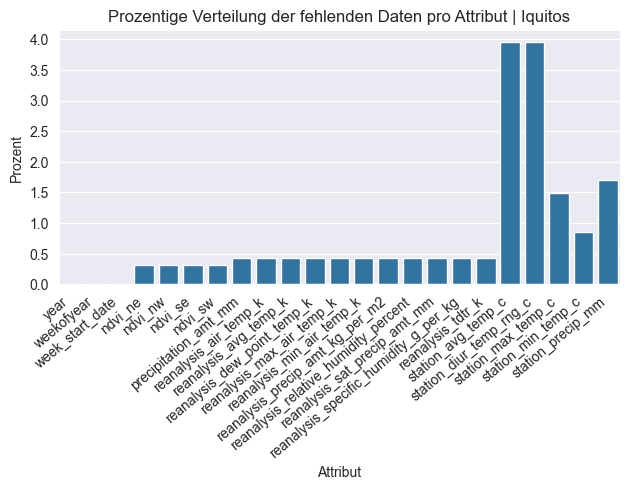

In [247]:
null_vals = df_iq_train.isnull().sum()
total_vals = len(df_sj_train)
null_percent = (null_vals / total_vals) * 100

df_null_percent = pd.DataFrame({'Attribut': null_vals.index, 'Prozent': null_percent.values})

barplot = sns.barplot(x='Attribut', y='Prozent', data=df_null_percent)
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('Prozentige Verteilung der fehlenden Daten pro Attribut | Iquitos')
plt.savefig('pictures/prozentverteilung_null_werte_iq.png',bbox_inches="tight")
plt.show()

## Wertebereichverteilung
In welchen Wertebereichen liegen die Werte der Attribute?

In [248]:
df_sj_num = df_sj_train.drop(columns=ignore_cols)
result_df = pd.DataFrame({
    'max': df_sj_num.max(),
    'min': df_sj_num.min(),
    'avg': df_sj_num.mean()
})
result_df

,max,min,avg
ndvi_ne,0.493400,-0.406250,0.057925
ndvi_nw,0.437100,-0.456100,0.067469
ndvi_se,0.393129,-0.015533,0.177655
ndvi_sw,0.381420,-0.063457,0.165956
precipitation_amt_mm,390.600000,0.000000,35.470809
reanalysis_air_temp_k,302.200000,295.938571,299.163653
reanalysis_avg_temp_k,302.164286,296.114286,299.276920
reanalysis_dew_point_temp_k,297.795714,289.642857,295.109519
reanalysis_max_air_temp_k,304.300000,297.800000,301.398817
reanalysis_min_air_temp_k,299.900000,292.600000,297.301828


In [249]:
df_iq_num = df_iq_train.drop(columns=ignore_cols)
result_df = pd.DataFrame({
    'max': df_iq_num.max(),
    'min': df_iq_num.min(),
    'avg': df_iq_num.mean()
})
result_df

,max,min,avg
ndvi_ne,0.508357,0.061729,0.263869
ndvi_nw,0.454429,0.035860,0.238783
ndvi_se,0.538314,0.029880,0.250126
ndvi_sw,0.546017,0.064183,0.266779
precipitation_amt_mm,210.830000,0.000000,64.245736
reanalysis_air_temp_k,301.637143,294.635714,297.869538
reanalysis_avg_temp_k,302.928571,294.892857,299.133043
reanalysis_dew_point_temp_k,298.450000,290.088571,295.492982
reanalysis_max_air_temp_k,314.000000,300.000000,307.082752
reanalysis_min_air_temp_k,296.000000,286.900000,292.866667


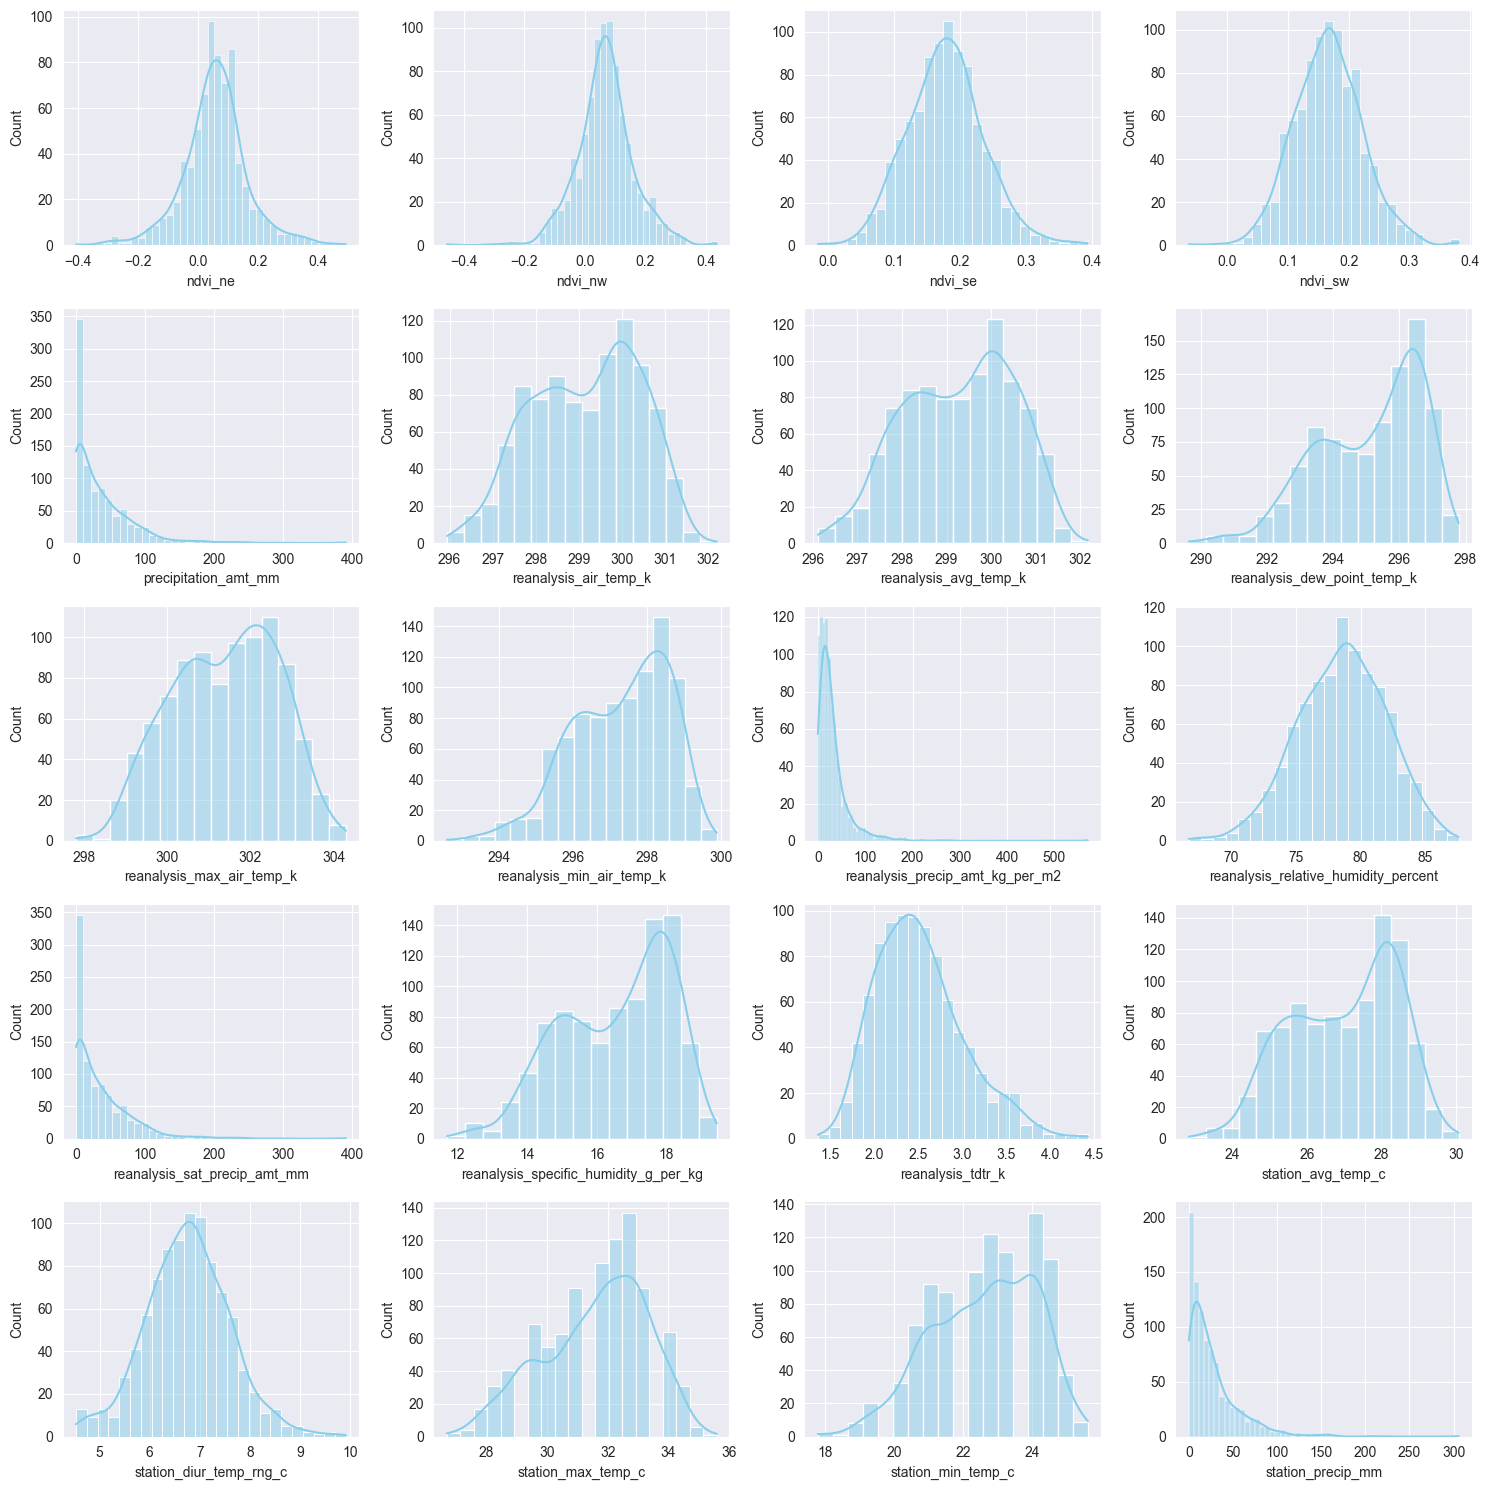

In [250]:
df_sj_span = df_sj_train.drop(columns=ignore_cols)
num_rows = 5
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()
for i, column in enumerate(df_sj_span.columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=df_sj_span, x=column, kde=True, color="skyblue", ax=axs[i])
plt.tight_layout()
plt.show()

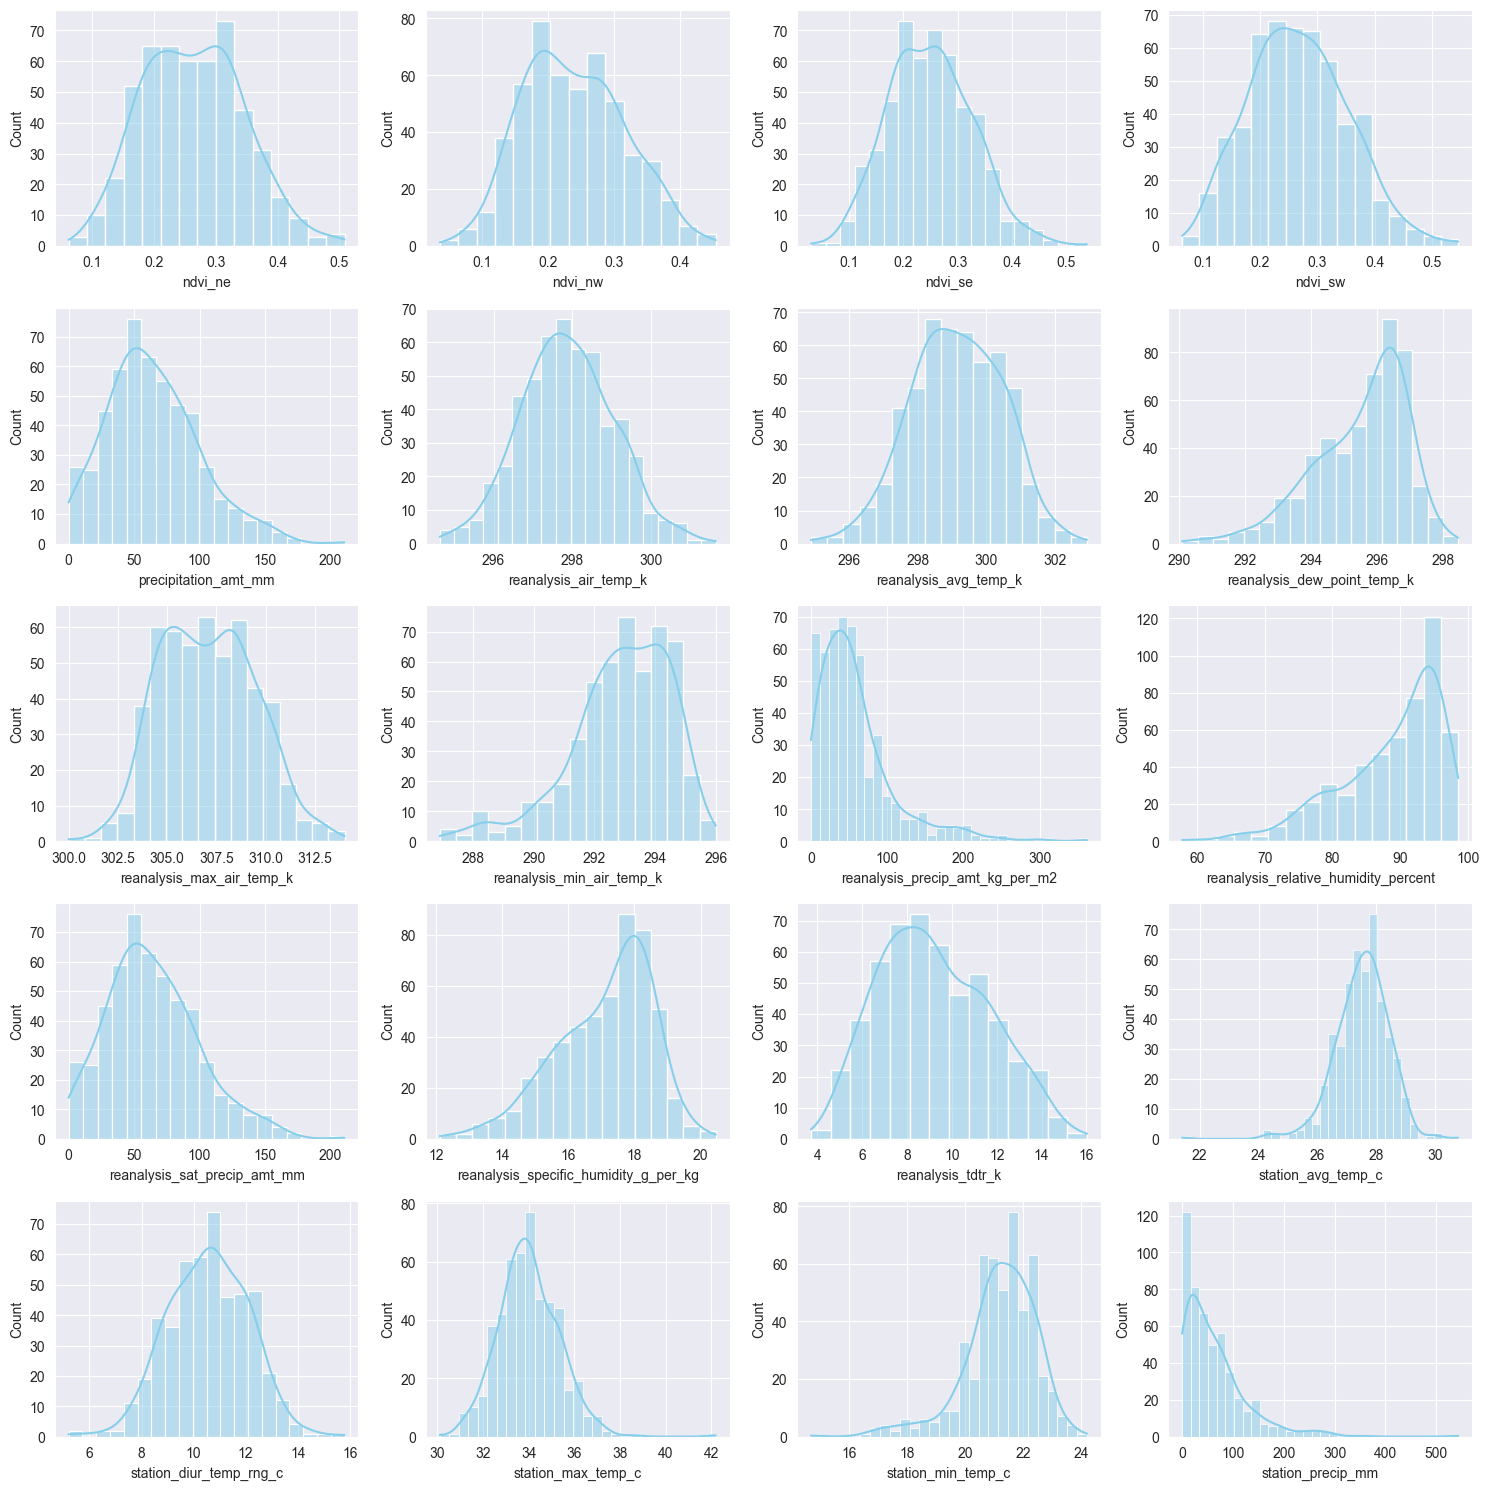

In [251]:
df_iq_span = df_iq_train.drop(columns=ignore_cols)
num_rows = 5
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()
for i, column in enumerate(df_iq_span.columns):
    row = i // num_cols
    col = i % num_cols
    sns.histplot(data=df_iq_span, x=column, kde=True, color="skyblue", ax=axs[i])
plt.tight_layout()
plt.show()

# Datenpräparation
Welche Daten sollen für das weitere Vorgehen ausgewählt werden?
Welche Daten und Attribute müssen bereinigt werden?
Müssen Daten transformiert werden?
Müssen Daten formatiert werden? (Manche wurden schon formatiert: 'week_start_date' wurde von String in Datetime formatiert) 

### Ermitteln von korrelierenden Attributen
Welche Attribute verhalten sich genau wie andere? Welche sind entfernt von einander?

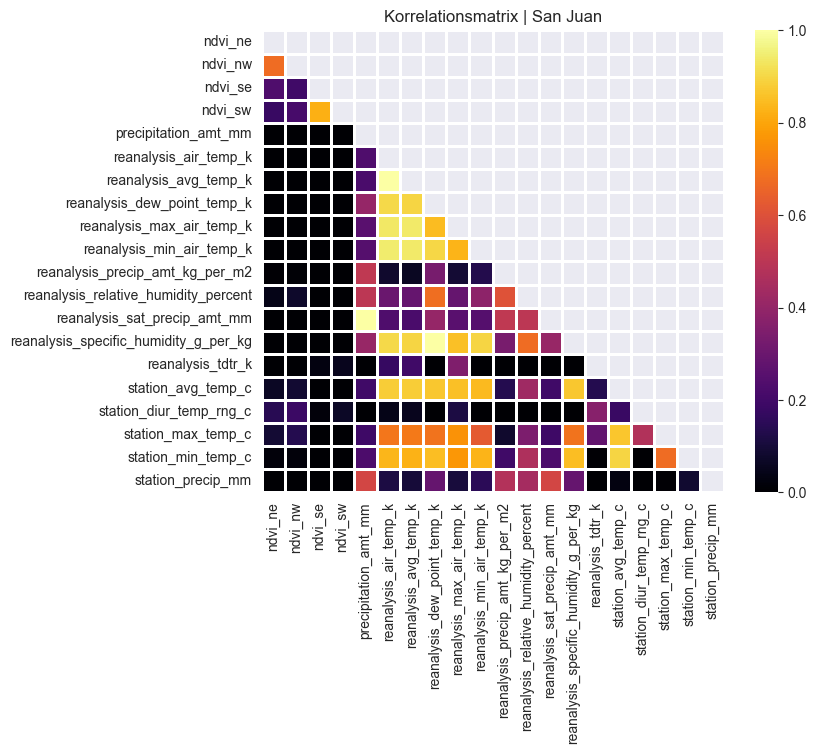

In [252]:
df_correlation = df_sj_train.drop(columns=ignore_cols)
correlation_matrix = df_correlation.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,cbar=True, linewidths=2,vmax=1, vmin=0, square=True, mask=mask, cmap='inferno')
plt.title('Korrelationsmatrix | San Juan')
plt.savefig('pictures/korrelationsmatrix_sj.png',bbox_inches="tight")
plt.show()

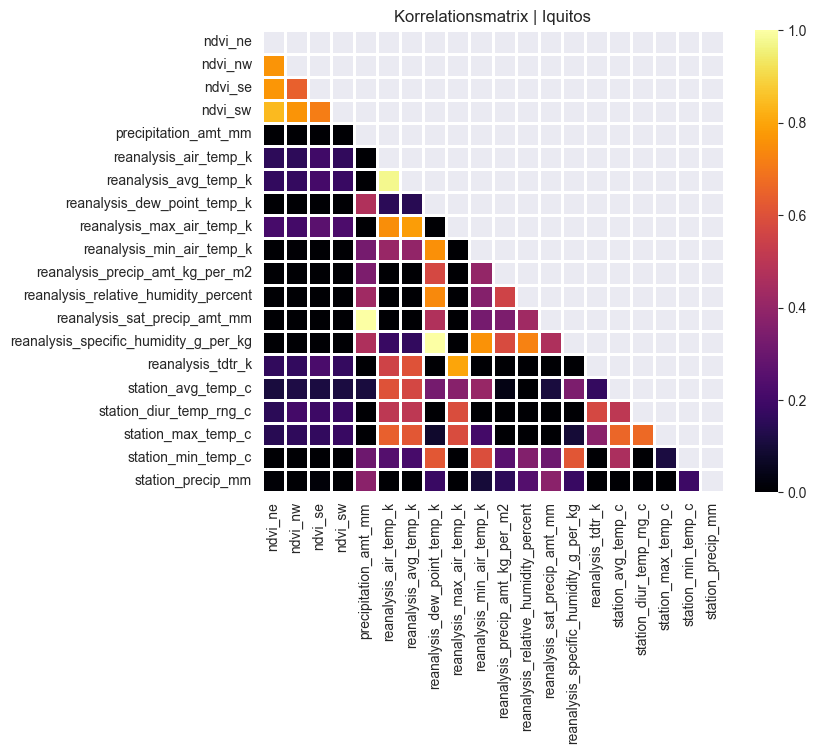

In [253]:
df_correlation = df_iq_train.drop(columns=ignore_cols)
correlation_matrix = df_correlation.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,cbar=True, linewidths=2,vmax=1, vmin=0, square=True, mask=mask, cmap='inferno')
plt.title('Korrelationsmatrix | Iquitos')
plt.savefig('pictures/korrelationsmatrix_iq.png',bbox_inches="tight")
plt.show()

Man sieht: die Spalten 'precipitation_amt_mm' und 'reanalysis_sat_precip_amt_mm' haben dieselben Werte.
Sie wurden zu einer Spalte zusammengeführt: total_precipitation_mm

In [254]:
df_sj_train['precipitation_amt_mm'].equals(df_sj_train['reanalysis_sat_precip_amt_mm'])
df_sj_train = df_sj_train.rename(columns={'precipitation_amt_mm': 'total_precipitation_mm'})
df_sj_train.drop(columns = ['reanalysis_sat_precip_amt_mm'],axis=1,inplace=True)

In [255]:
df_iq_train['precipitation_amt_mm'].equals(df_iq_train['reanalysis_sat_precip_amt_mm'])
df_iq_train = df_iq_train.rename(columns={'precipitation_amt_mm': 'total_precipitation_mm'})
df_iq_train.drop(columns = ['reanalysis_sat_precip_amt_mm'],axis=1,inplace=True)